# Data Wrangling
The purpose of data wrangling is to transform data from its initial format to a format that are better for analysis. This process include cleaning, structuring and enriching raw data so that the data will be ready for analysis. 

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

To demonstrate how data wrangling is done, I will use automobile dataset which is hosted on IBM Cloud object. 

In [83]:
file_source = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

The next step is creating python list of headers. The headers will be used to name each column in the dataset.

In [84]:
file_headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

Then, I use `read_csv` method to load the data and set parameter names equal to *file_headers* variable.

In [85]:
df = pd.read_csv(file_source, names=file_headers)

In [86]:
df.head() # Display the first five rows of the dataset

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Identify Missing Value

What do we do first after data has been loaded? We need to examine the dataset by looking maybe the first five or ten rows. One of the first thing to check is missing value. It is important because missing prevent us from doing good and right analysis. So, first thing to do is **identify missing value**. The preview of our dataset shows three cells with question marks, no value which indicates missing value and we need to deal with that. 

### 1. Convert "?" with `NaN`
For convenient and performance reasons, as stated __[here](https://pandas.pydata.org/pandas-docs/version/2.0.1/user_guide/missing_data.html)__ we will convert "?" with `NaN`.

In [87]:
df.replace("?", np.nan, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


I used `inplace = True` because I want to change the original dataframe and we used Pandas `replace` method. As we can see in the preview, the "?" has been replaced by `NaN`.

### 2. Evaluating Missing Data
There are two useful functions for evaluating missing data; `isnull()` and `notnull`. The output will be boolean value indicating missing or non missing data. Those functions are opposite to each other. `isnull` will produce `True` for missing data and `False` for non missing data and vice versa for the other function

In [88]:
missing_data1 = df.isnull()
missing_data1.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [89]:
missing_data2 = df.notnull()
missing_data2.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


As we can see from both preview how those two functions produce different results.

### 3. Count missing value in each column
After evaluating missing data, we for sure want to count how many missing values exist in our dataset. We can achieve that by applying python `for` loop. I will use missing_data1 in this case. 

In [90]:
for column in missing_data1.columns.values.tolist():
    print(missing_data1[column].value_counts())
    print("")

symboling
False    205
Name: count, dtype: int64

normalized-losses
False    164
True      41
Name: count, dtype: int64

make
False    205
Name: count, dtype: int64

fuel-type
False    205
Name: count, dtype: int64

aspiration
False    205
Name: count, dtype: int64

num-of-doors
False    203
True       2
Name: count, dtype: int64

body-style
False    205
Name: count, dtype: int64

drive-wheels
False    205
Name: count, dtype: int64

engine-location
False    205
Name: count, dtype: int64

wheel-base
False    205
Name: count, dtype: int64

length
False    205
Name: count, dtype: int64

width
False    205
Name: count, dtype: int64

height
False    205
Name: count, dtype: int64

curb-weight
False    205
Name: count, dtype: int64

engine-type
False    205
Name: count, dtype: int64

num-of-cylinders
False    205
Name: count, dtype: int64

engine-size
False    205
Name: count, dtype: int64

fuel-system
False    205
Name: count, dtype: int64

bore
False    201
True       4
Name: count, dtype: 

Based on the summary above, each column has 205 rows. One important thing here is the missing data; 7 columns contain missing data. They are:
1. *normalized-losses*: 41 missing data
2. *num-of-doors*: 2 missing data
3. *bore*: 4 missing data
4. *stroke*: 4 missing data
5. *horsepower*: 2 missing data
6. *peak rpm*: 2 missing data
7. *price*: 4 missing data

### 4. Dealing with Missing Data
After identifying and evaluating missing data, what to do next? How to deal with it?

There are two common methods for dealing with missing data. First, we can **drop** them. Second, we can **replace** them with new value. 
1. Drop Data: drop the whole row or drop the whole column.
2. Replace Data: replace it by mean, by frequency or based on other functions.

In this case, I will do the following:
Replace by mean the following columns:
- normalized-losses
- bore
- stroke
- horsepower
- peak rpm

Replace by freq (mode):
- num of doors, rationale: sedans are four doors. Since four doors is most frequent, it is most likely to occur

Drop the whole row:
- price, rationale: this is our target variable (y), we cannot using rows with missing values in supervised learning.

I'll start dealing with missing data by calculating mean.

In [91]:
# Calculate mean for "normalized-losses"
avg_norm_loss = df["normalized-losses"].astype(float).mean()
print("Average noralized-losses:", avg_norm_loss)

Average noralized-losses: 122.0


In [92]:
# Replace NaN with mean values in normalized-loss column
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

/var/folders/7m/y8yqbwcj4_s9pbq64p2cdkw00000gn/T/ipykernel_1380/1108523213.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)


In [93]:
# Calculate mean value for bore column
avg_bore = df["bore"].astype(float).mean()
print("Average bore:", avg_bore)

Average bore: 3.3297512437810943


In [94]:
# Replace NaN with mean bore value in bore column
df["bore"] = df["bore"].replace(np.nan, avg_bore)
# df["bore"].isnull().value_counts() # I am checking if the original data has been changed.

In [95]:
# Calculate the mean value for "stroke" column
avg_stroke = df["stroke"].astype(float).mean()
print("Average stroke:", avg_stroke)

Average stroke: 3.255422885572139


In [96]:
# replace nan with mean value for stroke
df["stroke"] = df["stroke"].replace(np.nan, avg_stroke)

In [97]:
# Calculate mean value for "horsepower" column
avg_horsepower = df["horsepower"].astype(float).mean()
print("Average horsepower:", avg_horsepower)

Average horsepower: 104.25615763546799


In [98]:
# Replace nan with mean value for horsepower column
df["horsepower"] = df["horsepower"].replace(np.nan, avg_horsepower)

In [99]:
# Calculate mean value for peak-rpm column
avg_peak_rpm = df["peak-rpm"].astype(float).mean()
print("Average peak-rpm:", avg_peak_rpm)

Average peak-rpm: 5125.369458128079


In [100]:
# Replace nan with mean value for peak-rpm
df["peak-rpm"] = df["peak-rpm"].replace(np.nan, avg_peak_rpm)

In [101]:
df["num-of-doors"].value_counts() # I use value_counts() method to see what values present is this column

num-of-doors
four    114
two      89
Name: count, dtype: int64

In [102]:
df["num-of-doors"] = df["num-of-doors"].replace(np.nan, "four")
df["num-of-doors"].value_counts() # checking changes

num-of-doors
four    116
two      89
Name: count, dtype: int64

In [103]:
# drop all rows that do not have price data
df.dropna(subset=["price"], axis=0, inplace=True)

In [104]:
# I need to reset the dataset's index, because I dropped two rows
df.reset_index(drop=True, inplace=True)

In [105]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


I've done dealing with missing data. We've replace several columns with mean value, one with mode and drop several rows. The next thing we have to do in data cleaning is **correcting data format**.

### Correct Data Format
In this step, we need to check and make sure that all the data in correct format such as `int`, `float`, `text` or other. There are two useful functions in pandas we can do to deal with this:
- `dtype()` to check the data type
- `astype()` to change the data type

For that, I need to check all the data types in the dataset.

In [106]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

As we can see that some columns are not of the correct data type. Numerical variable should have type `float` and `int` and string variables and categories should have type `object`. In th preview above, `normalized-losses`that describes the average loss per car per year should be the type of float or int. The other numerical variables such as `bore`, `stroke`, `horsepower` and `price` should be in the type of `float` or `int`.

In [107]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

Then I need to check the data after conversion

In [108]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [51]:
# wait I forget to convert horsepower with float
df[["horsepower"]] = df[["horsepower"]].astype("float")

In [109]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Now we have clean dataset with no missing value and proper dataset.

## Data Standardization
After cleaning data, it is important to standardize the data. Standardization is the process of transforming numerical variables so they all have similar scales. Typically, we do this by substracting original value by the mean and divide by the standard deviation.


In [110]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df['city-mpg']

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [111]:
df['highway-mpg'] = 235/df['highway-mpg'] # I transfrom mpg to L/100km

# Then I rename the column name to highway-L/100km
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

In [112]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


I successfully standardize two variables, mpg to L/100km. Cool, now it is time for **data normalization**.

## Data Normalization
Normalization is the process of transforming values of several variables into similar range. It includes:
1. scaling the variable so the variable average is 0
2. scaling the variable so the variance is 1
3. scaling the variable so the variable values range from 0 to 1.

To accomplish this, we replace the original value by dividing the original value by its maximum value. 

In [113]:
df["height"] = df["height"]/df["height"].max()

In [114]:
df['width'] = df['width']/df['width'].max()
df["length"] = df["length"]/df["length"].max()

In [115]:
df[["height", "width", "length"]].head()

,height,width,length
0,0.816054,0.890278,0.811148
1,0.816054,0.890278,0.811148
2,0.876254,0.909722,0.822681
3,0.908027,0.919444,0.848630
4,0.908027,0.922222,0.848630


I've been sucessfull normalizing three variables `height`, `width`, `length`.

## Bining
Is the process of transforming numerical value into categories or groups. In other words we gorup them into bins for better or easier analysis. 
In this case, I'll do bining for variable horsepower. 

In [116]:
# first we convert the varible into correct data format
df["horsepower"] = df["horsepower"].astype(int, copy =True)

Text(0.5, 1.0, 'Horsepower Bins')

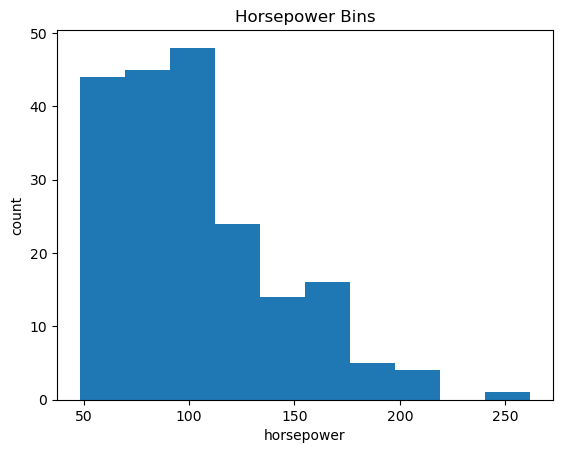

In [117]:
# Plot the histogram of horsepower to see the distribution of horsepower.
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# Set labels and title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("Horsepower Bins")

In [118]:
# group data into 3 bins
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [119]:
# set group names
group_names = ["Low", "Medium", "High"]

Apply the function "cut" to determine what each value of `df['horsepower']` belongs to.

In [120]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True)
df[['horsepower', 'horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [67]:
# see the number of each bins
df["horsepower-binned"].value_counts()

horsepower-binned
Low       153
Medium     43
High        5
Name: count, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

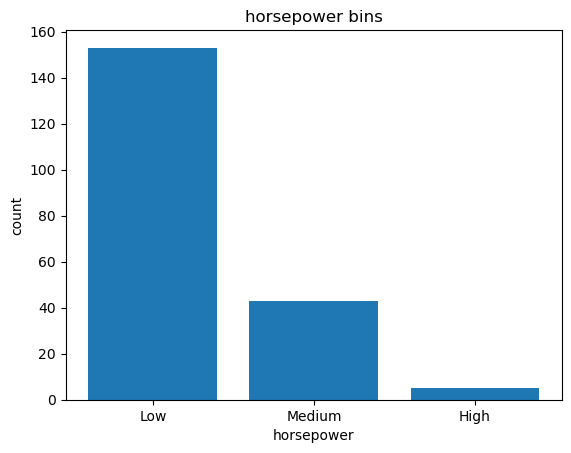

In [121]:
# plot the dist of each bin
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

### Bins Visualization

Text(0.5, 1.0, 'Horsepower Bins')

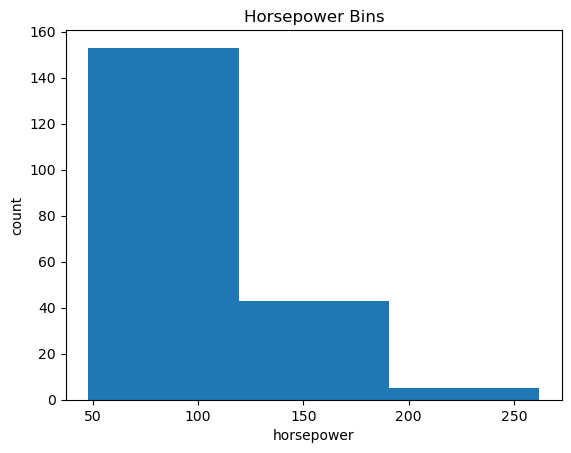

In [122]:
# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins=3)

# set labels
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("Horsepower Bins")

The plot above shows the binning result for the attribute "horsepower". 

## Indicator Variable (or Dummy Var)
An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 

Why use indicator variables?

You use indicator variables so you can use categorical variables for regression analysis in the later modules.
Example

The column "fuel-type" has two unique values: "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, you can convert "fuel-type" to indicator variables.

Use the Panda method 'get_dummies' to assign numerical values to different categories of fuel type. 

In [123]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

In [124]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

In [127]:
# Get the indicator variables and assign it to data frame "dummy_var1":
dummy_var1 = pd.get_dummies(df["fuel-type"], dtype=int)

In [128]:
print(dummy_var1.head())
print(dummy_var1.dtypes)

   diesel  gas
0       0    1
1       0    1
2       0    1
3       0    1
4       0    1
diesel    int64
gas       int64
dtype: object


In [129]:
# Change the column names for clarity:
dummy_var1.rename(columns={"gas":"fuel-type-gas", "diesel":"fuel-type-diesel"}, inplace=True)
dummy_var1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [130]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_var1], axis=1)

In [131]:
# chceck
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,0,1
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,0,1
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,0,1
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,0,1


In [132]:
# Now I need to drop the fuel-type column since we don't need it anymore. I'll use pandas' drop function to achieve that
df.drop("fuel-type", axis=1, inplace=True)

In [133]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,0,1


Now I need to create indicator variable for the column `aspiration`

In [135]:
dummy_var2 = pd.get_dummies(df["aspiration"], dtype=int)
dummy_var2.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [136]:
dummy_var2.rename(columns={"std":"aspiration-std", "turbo":"aspiration-turbo"}, inplace=True)
dummy_var2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [137]:
# Now I need to merge the new dummy var to original df
df = pd.concat([df, dummy_var2], axis=1)
# and check the modified df
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0


In [138]:
# then I need to drop the original aspiration column since I don't need it anymore
df.drop("aspiration", axis=1, inplace=True)
# check new modified DataFrame
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0


Finally I'll save the processed DataFrame into new CSV file.

In [139]:
df.to_csv('clean_df.csv')